In [7]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [8]:

%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

<h1 align='center'>Introducting Interactivity into Jupyter Notebooks</h1>

<h4 align='center'>Laura Gutierrez Funderburk$\mid$ SciProg $\mid$ Simon Fraser University</h4>

<h2 align='center'>Jupyter Magics</h2>

What if we want to embed HTML, Javascript or other language within our Jupyter notebook? Furthermore, what if we want to allow the user to interact with plots via click? 

It turns out we can do that via "magics". In this notebook we will focus on %%html, %%latex and %matplotlib notebook magics, although the user is welcome to explore single magics here https://ipython.readthedocs.io/en/stable/interactive/magics.html#

To call a cell magic, we will follow the format

%%magic_name or %magic_name

<h3 align='center'>Interactive Plots with the %matplotlib notebook magic</h3>

We will begin with a simple example that allows the user to create images by building line segments whenever they click. We have implemented a button that allows to restart that action when pressed. 

In [9]:
# %matplotlib notebook

# import numpy as np
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.plot(np.random.rand(10))

# def onclick(event):
#     print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#           ('double' if event.dblclick else 'single', event.button,
#            event.x, event.y, event.xdata, event.ydata))

# cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


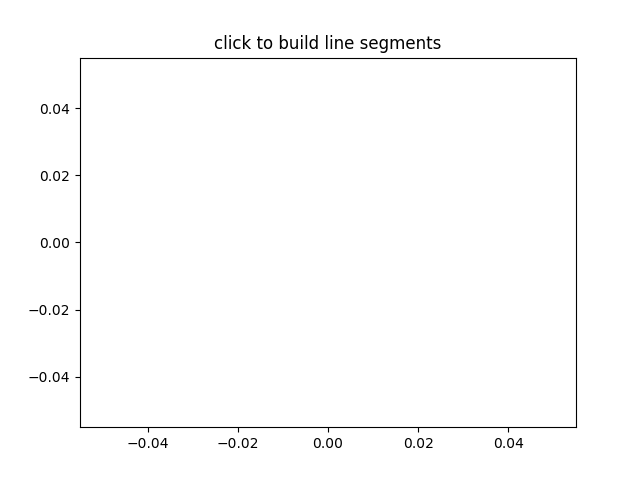

Button(button_style='info', description='Restart', layout=Layout(height='30px', width='20%'), style=ButtonStyle())

In [10]:
%matplotlib notebook

from matplotlib import pyplot as plt
from ipywidgets import widgets,Layout
from IPython.display import Javascript

def run_cells(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+1)'))

mean_exercise_button = widgets.Button( button_style='info',description="Restart", layout=Layout(width='20%', height='30px') )


# On button click, execute the next cell

mean_exercise_button.on_click( run_cells )
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()


# Display widgets


display(mean_exercise_button)
mean_exercise_button.on_click( run_cells )

#### Exercise

1.  to the top of this notebook, and click on the word "here"

The raw code for this IPython notebook is by default hidden for easier reading. To toggle on/off the raw code, click here.

2. Find all cells containing the magic %matplotlib notebook and replace them with the magic %matplotlib inline. 

3. Restart and run the notebook. 

4. What is different this time? 

As it turns out the %matplotlib notebook magic is crucial for allowing user interaction within matplotlib plots. 



<h3 align='center'>HTML (and Javascript) Magic</h3>

Suppose we want to create a timeline that the user can navigate. It is probably more difficult to achieve that with Python than it is with HTML. We will call the %%html magic to embed HTML code into our notebook.

For example, the magic used below was implemented to make the code for the plot above easier to read. 

As an exercise, remove that cell and press Restart and Run all. What is different this time? 



In [11]:

%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

We can use the %%html magic to make our notebook interactive via using Javacript. See the example below that implements a simple timeline. 

In [12]:
%%html

<style>

* {box-sizing:border-box}

/* Slideshow container */
.slideshow-container {
  max-width: 1000px;
  position: relative;
  margin: auto;
}

/* Hide the images by default */
.mySlides {
    display: none;
}

/* Next & previous buttons */
.prev, .next {
  cursor: pointer;
  position: absolute;
  top: 50%;
  width: auto;
  margin-top: -22px;
  padding: 16px;
  color: black;
  font-weight: bold;
  font-size: 18px;
  transition: 0.6s ease;
  border-radius: 0 3px 3px 0;
}

/* Position the "next button" to the right */
.next {
  right: 0;
  border-radius: 3px 0 0 3px;
}

/* On hover, add a black background color with a little bit see-through */
.prev:hover, .next:hover {
  background-color: rgba(0,0,0,0.8);
}

/* Caption text */
.text {
  color: #000000;
  font-size: 15px;
  padding: 8px 12px;
  position: absolute;
  bottom: 8px;
  width: 100%;
  text-align: right;
}

/* Number text (1/3 etc) */
.numbertext {
  color: #f2f2f2;
  font-size: 12px;
  padding: 8px 12px;
  position: absolute;
  top: 0;
}

/* The dots/bullets/indicators */
.dot {
  cursor: pointer;
  height: 15px;
  width: 15px;
  margin: 0 2px;
  background-color: black;
  border-radius: 50%;
  display: inline-block;
  transition: background-color 0.6s ease;
}

.active, .dot:hover {
  background-color: #717171;
}

/* Fading animation */
.fade {
  -webkit-animation-name: fade;
  -webkit-animation-duration: 1.5s;
  animation-name: fade;
  animation-duration: 1.5s;
}

@-webkit-keyframes fade {
  from {opacity: .4} 
  to {opacity: 1}
}

@keyframes fade {
  from {opacity: .4} 
  to {opacity: 1}
}

</style>

<script>

var slideIndex = 1;
showSlides(slideIndex);

// Next/previous controls
function plusSlides(n) {
  showSlides(slideIndex += n);
}

// Thumbnail image controls
function currentSlide(n) {
  showSlides(slideIndex = n);
}

function showSlides(n) {
  var i;
  var slides = document.getElementsByClassName("mySlides");
  var dots = document.getElementsByClassName("dot");
  if (n > slides.length) {slideIndex = 1} 
  if (n < 1) {slideIndex = slides.length}
  for (i = 0; i < slides.length; i++) {
      slides[i].style.display = "none"; 
  }
  for (i = 0; i < dots.length; i++) {
      dots[i].className = dots[i].className.replace(" active", "");
  }
  slides[slideIndex-1].style.display = "block"; 
  dots[slideIndex-1].className += " active";
}

</script>

<body>
<div class="slideshow-container">

  <!-- Full-width images with number and caption text -->

  <div class="mySlides">
    <div class="numbertext">1 / 3</div>
    <img src="./images/tree3.png" style="width:15%;height:150px">
  </div>

  <div class="mySlides">
    <div class="numbertext">2 / 3</div>
    <img src="./images/tree4.png" style="width:25%;height:250px">
  </div>
 
<div class="mySlides">
    <div class="numbertext">3 / 3</div>
    <img src="./images/tree5.png" style="width:35%;height:350px">
  </div>



  <!-- Next and previous buttons -->
  <a class="prev" onclick="plusSlides(-1)">&#10094;</a>
  <a class="next" onclick="plusSlides(1)">&#10095;</a>
</div>
<br>

<!-- The dots/circles -->
<div style="text-align:center">
  <span class="dot" onclick="currentSlide(1)"></span> 
  <span class="dot" onclick="currentSlide(2)"></span> 
  <span class="dot" onclick="currentSlide(3)"></span> 

</div>


</body>

<h2 align='center'>Summary</h2>

In this notebook we learned about the use of magics and how they can help us introduce interactivity into our notebooks. 

To see more elaborate examples of what can be done with html and Javascript, we leave the reader to explore D3 https://d3js.org/ 

This concludes this workshop. 